## Objective: build a more complex neural network that:
    - get directly the data from the csv file generated by the One_layer_model
    - Do a clustering on the data
    - Do some data augmentation based on SMOTE technique
    - Scale the data using StandardScaler
    - Train a complex neural network on it

In [91]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## Read the CSV file generated from the one layer forecast
    - We avoid rewriting lines of code that assembles the data

In [92]:
dataset_cluster = pd.read_csv('private_public_file.csv')

In [93]:
X = pd.get_dummies(dataset_cluster["IQ_CATEGORY"],sparse = False)



In [94]:
dataset_cluster.insert(12,"IQ_PRIV",X[0.0],True)
dataset_cluster.insert(13,"IQ_PUB",X[1.0],True)
#dataset.rename(columns={"0.0":"IQ_PRIVATE","1.0":"IQ_PUBLIC"})

In [95]:
dataset_cluster.head()

,Unnamed: 0,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,IQ_CATEGORY
0,0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0,0.0
1,1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0,0.0
2,2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0,0.0
3,3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0,0.0
4,4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0,0.0


In [96]:
# We create  a copy of this dataframe
dataset_cluster_copy2 = dataset_cluster.copy(deep = True)

In [97]:
dataset_cluster_copy2.head()

,Unnamed: 0,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,IQ_CATEGORY
0,0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0,0.0
1,1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0,0.0
2,2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0,0.0
3,3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0,0.0
4,4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0,0.0


## Cluster the data using K-means and based on the numerical features
    - We calulate the inertia and the silhouette score for several number of clusters and choose the best based on these two metrics
    - Inertia : Cohesion (how close points in a cluster are relative to each other) 
    - Silhouette score :  Separation (how far the clusters are relative to each other).


In [98]:

from sklearn.metrics import silhouette_samples, silhouette_score
inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of #how internally coherent clusters are.)
sil = [] # List the silhouette score
X = dataset_cluster_copy2.loc[:,'IQ_EBIT':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))


Text(0.5, 1.0, 'Silhouetter Score Curve')

<Figure size 576x576 with 0 Axes>

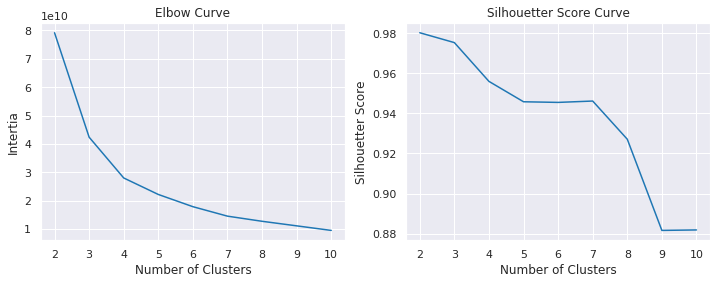

In [99]:
sns.set_context('notebook')
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [100]:
# We retain 4 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=4, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)


In [101]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 9261
1 55
2 20
3 127


In [102]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)

dataset_cluster_copy2 = dataset_cluster_copy2.assign(centroids=clusters.values)

dataset_cluster_copy2.drop(['Unnamed: 0','IQ_CATEGORY'],axis = 1,inplace = True)
dataset_cluster_copy2.head()


,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,centroids
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0,0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0,0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0,0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0,0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0,0


In [103]:
dataset_cluster_copy2.dtypes

company                 object
year                   float64
quarter                 object
IQ_EBIT                float64
IQ_TOTAL_OTHER_OPER    float64
IQ_OPER_INC            float64
IQ_TOTAL_REV           float64
TARGET                 float64
IQ_AR                  float64
IQ_RE                  float64
IQ_TOTAL_ASSETS        float64
IQ_PRIV                  uint8
IQ_PUB                   uint8
centroids                int32
dtype: object

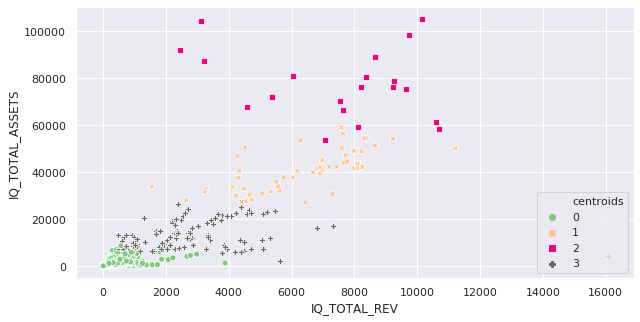

In [105]:
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "Accent",data = dataset_cluster_copy2)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

## We build a decision tree in order to discover the real causes of the clustering that can be explained to business partner
    - We develop a business tree model and evaluate it and the accuracy score is very close to 1
    - We extract a file that shows the decision tree

In [116]:
#Showing the decision tree of the clustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
plt.rcParams["figure.figsize"]=20,20
X_scale  = dataset_cluster_copy2.loc[:,"IQ_EBIT":"IQ_PUB"]
y_scale = pd.get_dummies(dataset_cluster_copy2.loc[:,"centroids"])
X_scale_train,X_scale_test,y_scale_train,y_scale_test = train_test_split(X_scale,y_scale,random_state=0)
clf = tree.DecisionTreeClassifier(class_weight="balanced",criterion = "entropy",max_leaf_nodes = 6,random_state = 0)
clf.fit(X_scale_train, y_scale_train)
print(clf.score(X_scale_train,y_scale_train))
print(cross_val_score(clf,X_scale,y_scale))

y_pred_new = clf.predict(X_scale_test)
print("Accuracy score:",  metrics.accuracy_score(y_scale_test,y_pred_new))
#tree.plot_tree(clf) 

0.9883049175708045
[0.99936609 0.983513   0.97970831]
Accuracy score: 0.9902789518174133


/home/mbousso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [117]:
X_scale_train.columns

Index(['IQ_EBIT', 'IQ_TOTAL_OTHER_OPER', 'IQ_OPER_INC', 'IQ_TOTAL_REV',
       'TARGET', 'IQ_AR', 'IQ_RE', 'IQ_TOTAL_ASSETS', 'IQ_PRIV', 'IQ_PUB'],
      dtype='object')

In [118]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= X_scale_train.columns,  
                      class_names= dataset_cluster_copy2.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreeincome_neuralnets")

'decisiontreeincome_neuralnets.pdf'

In [119]:
# Get the dataset with the largest number of clusters
def get_data_greatest_cluster(dataset, num_clusters):
    dict_ind = {}
    for i in range(num_clusters):
            dict_ind[i] = len(dataset[dataset['centroids'] == i])
    l = max(dict_ind, key = dict_ind.get)
    other_cluster_num = [i for i in range(num_clusters) if i != l]
    return l, other_cluster_num
    

## We got 4 clusters and the first one got 90 % of the data
    - We will use the SMOTE technique in order to oversample the data of the other clusters
    - At the end all clusters will have the same number of points
    - We first install the appropriate library which is imblearn
    - We will create a new Dataframe that contains fourth time the number of data of the first cluster
    

In [120]:
!pip install imblearn

In [121]:
from imblearn.over_sampling import SMOTENC

In [122]:
smt = SMOTENC(random_state = 42,categorical_features=[7,8])
X_augment,y_augment= smt.fit_sample(dataset_cluster_copy2.loc[:,'IQ_EBIT':'IQ_PUB'], pd.Categorical(dataset_cluster_copy2.loc[:,'centroids']))

In [123]:
X_augment = pd.DataFrame(X_augment)
X_augment.columns = dataset_cluster_copy2.columns[3:13]

In [124]:
## Clusters have the same number of data

In [125]:
np.bincount(y_augment)

array([9261, 9261, 9261, 9261])

In [126]:
X_augment.head()

,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1.0,0.0
1,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1.0,0.0
2,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1.0,0.0
3,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1.0,0.0
4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1.0,0.0


In [127]:
X_augment.describe()

,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
count,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000,37044.000000
mean,821.496287,1784.924398,821.496287,4154.026450,4339.074806,2959.462348,11541.362285,34256.622709,0.081309,0.909301
std,863.189207,1611.938487,863.189207,3391.137588,3532.711111,2475.054717,15454.765143,31456.964481,0.273312,0.283010
min,-382.351930,-301.157650,-382.351930,-64.661670,-11.126720,0.000000,-6920.000000,0.006726,0.000000,0.000000
25%,16.302009,135.339508,16.302009,573.997821,658.799699,289.283660,37.205748,6223.313350,0.000000,1.000000
50%,554.675843,1347.213291,554.675843,4148.912653,4310.478570,2649.546687,4830.712341,26787.558500,0.000000,1.000000
75%,1476.127332,3274.023290,1476.127332,7445.179903,7715.281861,5324.364162,15306.994939,56838.147500,0.000000,1.000000
max,3916.000000,5210.468000,3916.000000,16088.604000,18481.367000,9378.246000,65723.390000,105390.030000,1.000000,1.000000


In [128]:
y_augment

array([0, 0, 0, ..., 3, 3, 3])

## We split the data into train and test sets
## We scale the new  data points using StandardScaler
    

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train,X_test = train_test_split(X_augment,random_state=0)
#plt.rcParams["figure.figsize"]=40,40

In [130]:
# Drop the scaling of Target
y_train = X_train['TARGET']
y_test = X_test['TARGET']
X_train.drop('TARGET',axis=1,inplace = True)
X_test.drop('TARGET',axis=1, inplace = True)

/home/mbousso/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
#Drop Target and scale the train and test set
X_train_scale = scaler_X.fit_transform(X_train.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"])
X_test_scale = scaler_X.transform(X_test.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"])


X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns[0:7]
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = X_test.columns[0:7]


X_train_scale.insert(7,'IQ_PRIV',X_train['IQ_PRIV'].values,False)
X_train_scale.insert(8,'IQ_PUB',X_train['IQ_PUB'].values,False)



X_test_scale.insert(7,'IQ_PRIV',X_test['IQ_PRIV'].values,False)
X_test_scale.insert(8,'IQ_PUB',X_test['IQ_PUB'].values,False)





In [132]:
#Scale the target train and test variable
y_train = y_train.values.reshape(len(y_train),1)
y_test = y_test.values.reshape(len(y_test),1)

y_train_scale = scaler_y.fit_transform(y_train)
y_test_scale = scaler_y.transform(y_test)

y_train_scale = pd.DataFrame(y_train_scale)
y_train_scale.columns = {'TARGET'}
y_test_scale = pd.DataFrame(y_test_scale)
y_test_scale.columns = {'TARGET'}


In [133]:
X_train_scale.head()

,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,-0.846894,-0.998734,-0.846894,-1.024964,-0.969463,-0.679088,-0.668289,0.0,1.0
1,-0.952281,-1.100173,-0.952281,-1.220841,-1.191886,-0.748671,-1.085071,0.0,1.0
2,0.573719,1.206522,0.573719,0.940162,0.573779,-0.990064,0.614795,0.0,1.0
3,2.825048,1.543351,2.825048,1.917708,1.848178,0.867161,1.036722,0.0,1.0
4,-0.780719,-0.965747,-0.780719,-0.958617,-0.865442,-0.842010,-0.697545,0.0,1.0


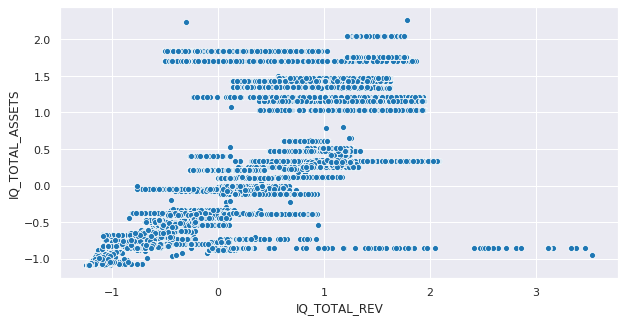

In [134]:
sns.set_context('notebook')
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'IQ_TOTAL_REV', y = 'IQ_TOTAL_ASSETS',data = X_train_scale)

## We create and build the deep neural net model

In [135]:
#!pip install tf-nightly-2.0_preview

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.python.data import Dataset

## Creation of the complex model after several trials and errors
    - A four layer nn with various number of  nodes

In [187]:
dataset = Dataset.from_tensor_slices((X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values,y_train_scale.values))

In [188]:
dataset = dataset.map(lambda window1, window2: ( window1,window2))
#for (window ,window2 )in dataset:
#    print(window.numpy(), window2.numpy())
dataset = dataset.shuffle(buffer_size = 10)
#Batching the data with size 100
dataset = dataset.batch(500).prefetch(1)
#for x,y in dataset:
#   print(x.numpy(),y.numpy())
    

In [189]:
def df_forecast(df,features_to_drop,features_to_add1,features_to_add2,df_to_add1, df_to_add2):
    df.drop(features_to_drop,axis = 1, inplace = True)
    df[features_to_add1] = df_to_add1
    df[features_to_add2] = df_to_add2
    return df


In [190]:
def error_data(df,errors,true_values,forecast):
    df[errors] = np.abs(np.abs(df.loc[:,true_values]) - np.abs(df.loc[:,forecast]))
    return df


In [191]:
# Model with four layers
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_shape=[9], activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
    
])

## Tuning hyperparameter in order to have the best learning rate

In [192]:
#Compilation of the 
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-2 * 10 ** (epoch / 30))
optimizer = SGD(lr=1e-2,momentum = 0.9)
dnn_model.compile(loss= "mae",optimizer = optimizer)
history = dnn_model.fit(dataset,epochs = 30, callbacks = [lr_schedule])

Epoch 1/30
56/56 [==============================] - 1s 24ms/step - loss: 0.3000
Epoch 2/30
56/56 [==============================] - 1s 13ms/step - loss: 0.1087
Epoch 3/30
56/56 [==============================] - 1s 15ms/step - loss: 0.0941
Epoch 4/30
56/56 [==============================] - 2s 28ms/step - loss: 0.0913
Epoch 5/30
56/56 [==============================] - 2s 30ms/step - loss: 0.0850
Epoch 6/30
56/56 [==============================] - 2s 27ms/step - loss: 0.0840
Epoch 7/30
56/56 [==============================] - 2s 29ms/step - loss: 0.0840
Epoch 8/30
56/56 [==============================] - 1s 19ms/step - loss: 0.0811
Epoch 9/30
56/56 [==============================] - 1s 22ms/step - loss: 0.0779
Epoch 10/30
56/56 [==============================] - 1s 18ms/step - loss: 0.0836
Epoch 11/30
56/56 [==============================] - 1s 10ms/step - loss: 0.0792
Epoch 12/30
56/56 [==============================] - 1s 25ms/step - loss: 0.0747
Epoch 13/30
56/56 [==================

In [193]:
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1220      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


[0.0001, 1, 0, 5]

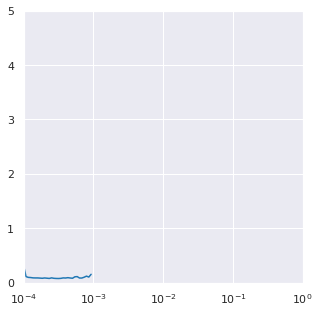

In [194]:
sns.set_context('notebook')
plt.figure(figsize=(5,5))
lrs = 1e-4*(10**(np.arange(30)/30))
plt.semilogx(lrs,history.history["loss"])
plt.axis([1e-4,1,0,5])

In [195]:
#Compilation of the model
import datetime
#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model.compile(loss= "mae",optimizer = SGD(lr=0.003,momentum = 0.9))
history = dnn_model.fit(dataset,epochs = 50) # callbacks = [tensorboard_callback])

Epoch 1/50
56/56 [==============================] - 2s 28ms/step - loss: 0.0801
Epoch 2/50
56/56 [==============================] - 1s 12ms/step - loss: 0.0520
Epoch 3/50
56/56 [==============================] - 1s 16ms/step - loss: 0.0496
Epoch 4/50
56/56 [==============================] - 1s 16ms/step - loss: 0.0484
Epoch 5/50
56/56 [==============================] - 1s 14ms/step - loss: 0.0477
Epoch 6/50
56/56 [==============================] - 2s 30ms/step - loss: 0.0469
Epoch 7/50
56/56 [==============================] - 2s 37ms/step - loss: 0.0464
Epoch 8/50
56/56 [==============================] - 2s 38ms/step - loss: 0.0458
Epoch 9/50
56/56 [==============================] - 2s 29ms/step - loss: 0.0453
Epoch 10/50
56/56 [==============================] - 3s 60ms/step - loss: 0.0449
Epoch 11/50
56/56 [==============================] - 1s 10ms/step - loss: 0.0445
Epoch 12/50
56/56 [==============================] - 2s 32ms/step - loss: 0.0440
Epoch 13/50
56/56 [==================

In [196]:
#  Get the weights of alla the features

print("layer weight {}", format(dnn_model.layers[3].get_weights()))

layer weight {} [array([[-0.38429698],
       [ 0.32428822],
       [-0.13869165],
       [ 0.38693705],
       [ 0.42142028],
       [ 0.98042524],
       [-0.4298641 ],
       [ 0.5987066 ],
       [-0.7338786 ],
       [ 0.4616818 ]], dtype=float32), array([-0.5477832], dtype=float32)]


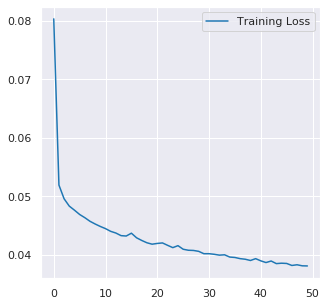

In [197]:

plt.figure(figsize=(5,5))
loss = history.history['loss']
epochs = range(len(loss))
sns.lineplot(epochs, loss,label = 'Training Loss')

In [198]:
train_mae = dnn_model.evaluate(X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values,y_train_scale.values,batch_size = 500,verbose = 0)

In [199]:
test_mae = dnn_model.evaluate(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values,y_test_scale.values,batch_size = 500,verbose = 0)

In [200]:
print(train_mae)
print(test_mae)

0.03762604354655185
0.038222494125752376


## Get the forecast data and rescale them

In [201]:
forecast_two_layers = dnn_model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()
forecast_two_layers = scaler_y.inverse_transform([forecast_two_layers]).flatten()
y_test_invert = scaler_y.inverse_transform(y_test_scale.values).flatten()

In [202]:
from sklearn.metrics import r2_score
print(r2_score(forecast_two_layers,y_test_invert))

0.9879100739737093


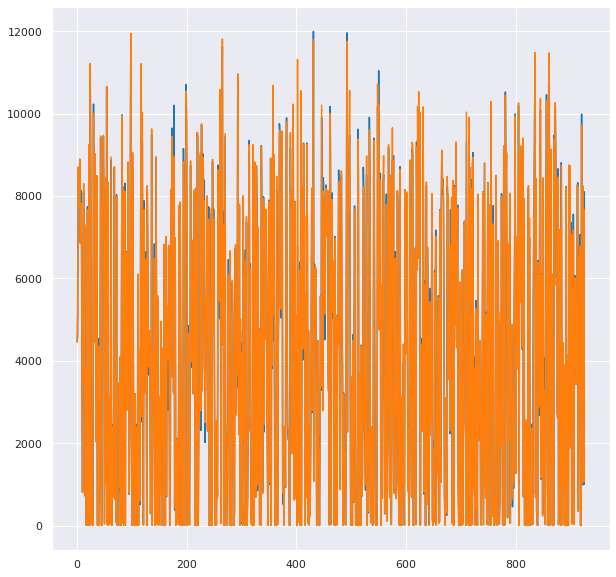

In [204]:
T = round(len(forecast_two_layers)/10)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.lineplot(x,forecast_two_layers[0:T])
sns.lineplot(x,y_test_invert[0:T])

In [206]:
tf.keras.metrics.mean_absolute_error(forecast_two_layers,y_test_invert).numpy()

134.8074806590676

In [207]:
tf.keras.metrics.mean_absolute_percentage_error(forecast_two_layers,y_test_invert).numpy()

15.49292860527377

In [208]:
tf.keras.losses.mse(forecast_two_layers,y_test_invert).numpy()

149793.16552423997

In [216]:
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']

In [217]:
df_X_test_copy = X_test_scale.copy(deep = True)

In [218]:
df_X_test_copy = df_forecast(df_X_test_copy,features + features_bal,'IQ_TOTAL_REV_NEXT','FORECAST',y_test_invert, forecast_two_layers)

In [219]:
df_X_test_copy = error_data(df_X_test_copy, 'ERRORS','IQ_TOTAL_REV_NEXT','FORECAST')

In [220]:
df_X_test_copy.describe()

,IQ_PRIV,IQ_PUB,IQ_TOTAL_REV_NEXT,FORECAST,ERRORS
count,9261.000000,9261.000000,9261.000000,9261.000000,9261.000000
mean,0.080877,0.909275,4380.588346,4363.947266,134.804196
std,0.272661,0.283270,3549.721321,3520.121826,362.815570
min,0.000000,0.000000,-8.227000,-12.383158,0.001850
25%,0.000000,1.000000,667.669951,695.905151,12.123191
50%,0.000000,1.000000,4336.793414,4312.656250,51.730248
75%,0.000000,1.000000,7735.570835,7825.137207,163.641524
max,1.000000,1.000000,18481.367000,12357.261719,11276.306941


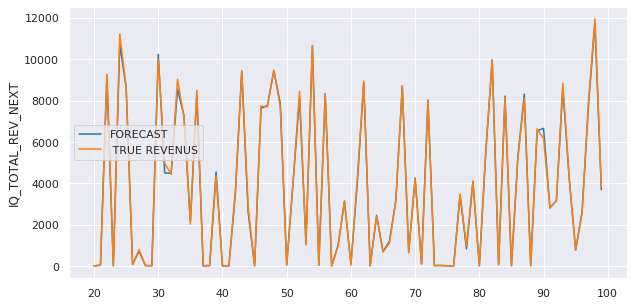

In [221]:
plt.figure(figsize=(10,5))
#idx = df_X_test_copy.index.get_loc(42)
sns.lineplot(x = range(20,100), y = 'FORECAST', data = df_X_test_copy[20:100],label ='FORECAST')
sns.lineplot(x = range(20,100), y = 'IQ_TOTAL_REV_NEXT', data = df_X_test_copy[20:100],label =' TRUE REVENUS')

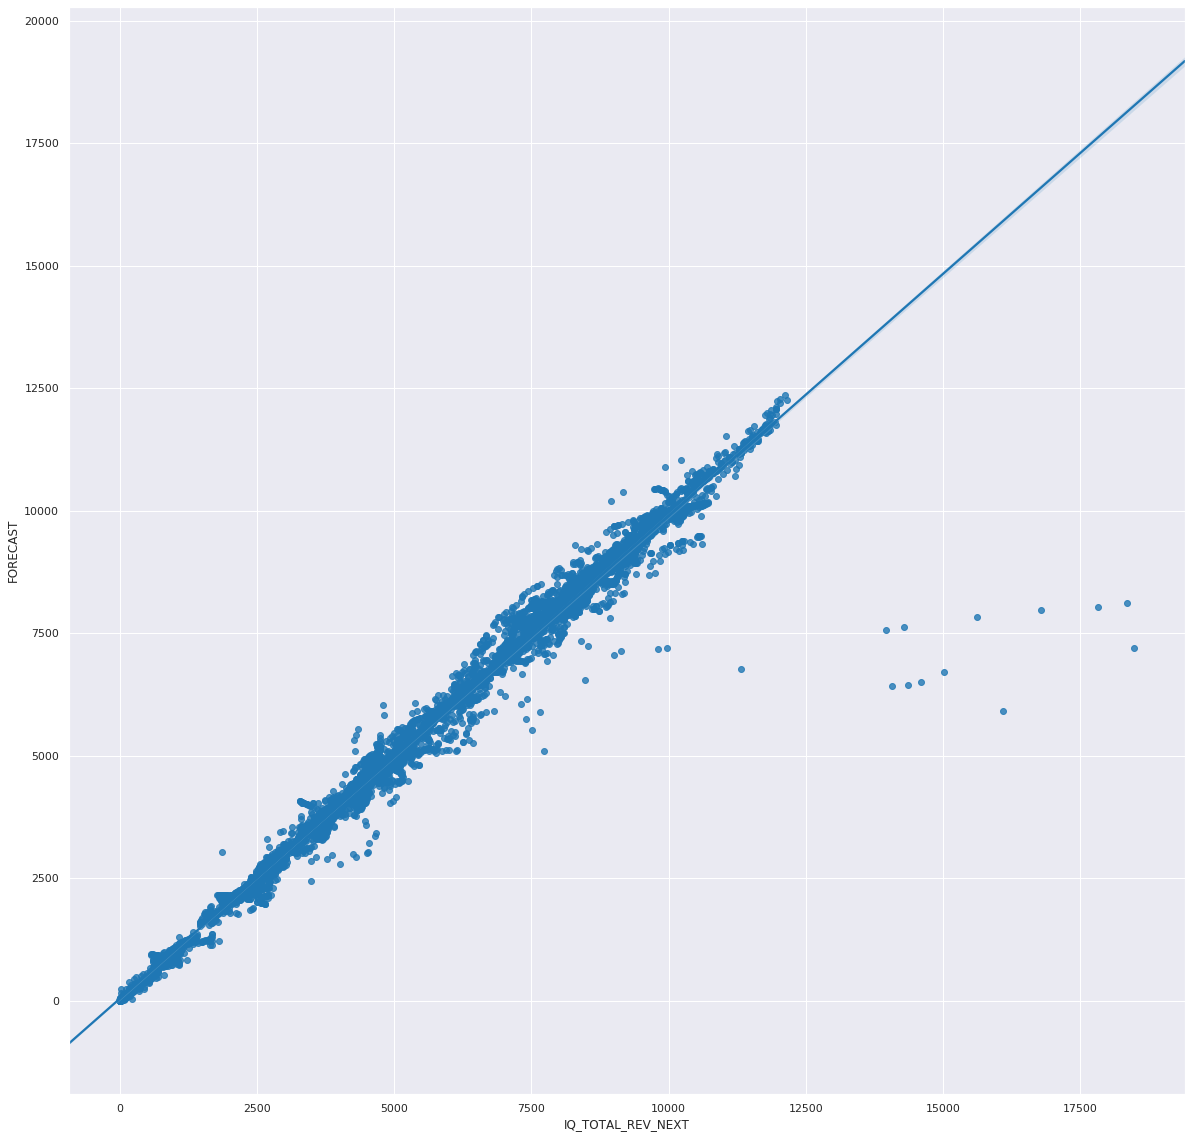

In [222]:
# Strong correlation between the revenue and the forecast
sns.regplot(x = 'IQ_TOTAL_REV_NEXT', y = 'FORECAST', data = df_X_test_copy)